In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DIR = "/content/drive/MyDrive/Colab Notebooks/Data Mining/TP - Individual/"

df_train = pd.read_csv(DIR + "properati_entrenamiento.csv.zip", index_col="id", parse_dates=['start_date',  'created_on'])  

df_train.head()

df_test = pd.read_csv(DIR + "properati_a_predecir.csv.zip", index_col="id", parse_dates=['start_date',  'created_on'])  
df_test.head()

df_train = df_train.rename({'lat':'longitud','lon':'latitud'},axis=1)
df_test = df_test.rename({'lat':'longitud','lon':'latitud'},axis=1)

#cotizaciones_usd = pd.read_csv(DIR + "DOLAR MEP - Cotizaciones historicas.csv", sep=';' , parse_dates=['fecha'], dayfirst=True)  


In [ ]:
df_train.shape

(994000, 24)

In [4]:
df_train = df_train.rename({'lat':'longitud','lon':'latitud'},axis=1)
df_test = df_test.rename({'lat':'longitud','lon':'latitud'},axis=1)


# INFO DE VARIABLES

    id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
    start_date - Fecha de alta del aviso.
    end_date - Fecha de baja del aviso.
    created_on - Fecha de alta de la primera versión del aviso.
    lat - Latitud.
    lon - Longitud.
    l1 - Nivel administrativo 1: país.
    l2 - Nivel administrativo 2: usualmente provincia.
    l3 - Nivel administrativo 3: usualmente ciudad.
    l4 - Nivel administrativo 4: usualmente barrio.
    l5 - Nivel administrativo 5
    l6 - Nivel administrativo 6
    rooms - Cantidad de ambientes (útil en Argentina).
    bedrooms - Cantidad de dormitorios (útil en el resto de los países).
    bathrooms - Cantidad de baños.
    surface_total - Superficie total en m².
    surface_covered - Superficie cubierta en m².
    price - Precio publicado en el anuncio.
    currency - Moneda del precio publicado.
    price_period - Periodo del precio (Diario, Semanal, Mensual)
    title - Título del anuncio.
    description - Descripción del anuncio.
    property_type - Tipo de propiedad (Casa, Departamento, PH).
    operation_type - Tipo de operación (Venta, Alquiler).


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994000 entries, 1 to 1000000
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ad_type          994000 non-null  object        
 1   start_date       994000 non-null  datetime64[ns]
 2   end_date         994000 non-null  object        
 3   created_on       994000 non-null  datetime64[ns]
 4   longitud         840826 non-null  float64       
 5   latitud          841760 non-null  float64       
 6   l1               994000 non-null  object        
 7   l2               994000 non-null  object        
 8   l3               936714 non-null  object        
 9   l4               225232 non-null  object        
 10  l5               4711 non-null    object        
 11  l6               0 non-null       float64       
 12  rooms            504328 non-null  float64       
 13  bedrooms         391380 non-null  float64       
 14  bathrooms        77

In [ ]:
pd.set_option('display.max_columns', None)
df_train.head(3)

,ad_type,start_date,end_date,created_on,longitud,latitud,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,,,,
1,Propiedad,2019-07-07,2019-07-10,2019-07-07,NaN,NaN,Argentina,Buenos Aires Interior,Urquiza,Urquiza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3800.0,ARS,Mensual,COCHERA EN ALQUILER,Xintel (SLC-SI1-560) Alquiler de Cochera en CA...,Cochera,Alquiler
2,Propiedad,2019-07-07,9999-12-31,2019-07-07,-64.184812,-31.421307,Argentina,Córdoba,Córdoba,NaN,NaN,NaN,1.0,NaN,NaN,12.0,12.0,16000.0,USD,Mensual,Cochera venta,VENDO COCHERA- EXCELENTE UBICACIÓN! Calle Buen...,Cochera,Venta
3,Propiedad,2019-07-07,2019-07-09,2019-07-07,-57.965880,-34.902568,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,NaN,NaN,NaN,NaN,NaN,12.0,NaN,16000.0,USD,NaN,Cochera cubierta con portón automatizado en ve...,Cochera Cubierta en venta ubicada en calle 7 e...,Cochera,Venta


# **ENTENDIMIENTO DE VARIABLES CATEGORICAS**

In [5]:

def imprimir_categoricas(columna):
  print(columna.name )
  porcentajes = np.round(columna.value_counts(normalize=True, dropna=False).values,2)
  cantidad = columna.value_counts(dropna=False).values
  indice = columna.value_counts(dropna=False).index
  print( pd.DataFrame({'#':cantidad, '%':porcentajes }, index=indice))
  print("\n")



### **REVISION TRAIN vs TEST**

In [6]:
for col in df_train.select_dtypes('object').drop('title', axis=1).columns:
  print("---------------------------------   \n TEST ")
  imprimir_categoricas(df_test[col])
  print("TRAIN ")
  imprimir_categoricas(df_train[col])

## INFO EN TEST

# ad_type no sirve (tiene solo propiedad)
# l1 es solo argentina
# l2 es Capital Federal y BsAs
# l3 tiene nans (y se ve la plata. microcentro (que no es un barrio)
# currency es solo dolar
# price period es Nans y mensual
# porperty type es departamento y ph
# operatio type es venta

---------------------------------   
 TEST 
ad_type
              #    %
Propiedad  6000  1.0


TRAIN 
ad_type
                #    %
Propiedad  994000  1.0


---------------------------------   
 TEST 
end_date
               #     %
9999-12-31  1188  0.20
2019-12-23   255  0.04
2019-08-14   177  0.03
2020-05-20   138  0.02
2020-02-13   130  0.02
...          ...   ...
2019-10-06     1  0.00
2019-09-08     1  0.00
2019-08-02     1  0.00
2020-01-04     1  0.00
2020-05-13     1  0.00

[396 rows x 2 columns]


TRAIN 
end_date
                 #     %
9999-12-31  190441  0.19
2020-04-28   75470  0.08
2020-04-27   20938  0.02
2019-12-23   19361  0.02
2019-08-14   14394  0.01
...            ...   ...
2019-07-07      29  0.00
2019-07-05      24  0.00
2019-07-08      22  0.00
2020-08-22       1  0.00
2019-07-04       1  0.00

[450 rows x 2 columns]


---------------------------------   
 TEST 
l1
              #    %
Argentina  6000  1.0


TRAIN 
l1
                     #     %
Argentina     

### **ELIMINAR CATEGORIAS PARA GARANTIZAR I.I.D. ENTRE TRAIN y TEST**

In [7]:
print(len(df_train))
df_train = df_train[df_train.l1 == 'Argentina']
df_train = df_train[df_train.operation_type == 'Venta']
df_train = df_train[df_train.property_type.isin(['Departamento','PH'])]
df_train = df_train[df_train.l2.isin(['Capital Federal']) | df_train.l3.isin(['La Plata'])]  #ver igual bien cuales necesito (agregar la plata)
df_train = df_train[df_train.l3 != 'Distrito Audiovisual' ]
df_train = df_train[~(df_train.currency=='ARS')] ## PROVISIORIO DESPUES PASAR A DOLAR

len(df_train)
#len(df_test)

994000


124532

In [8]:
len(df_train)
#len(df_test)

124532

In [ ]:
## revision....

for col in df_train.select_dtypes('object').drop(['title','description'], axis=1).columns:  
  x = pd.DataFrame({'Train':df_train[col].value_counts(normalize=True,dropna=False).round(2), 'Test':df_test[col].value_counts(normalize=True,dropna=False).round(2)})
  print("\n",col,x)



 ad_type            Train  Test
Propiedad    1.0   1.0

 end_date             Train  Test
2019-07-05   0.00   NaN
2019-07-06   0.00  0.00
2019-07-07   0.00   NaN
2019-07-08   0.00   NaN
2019-07-09   0.01  0.01
...           ...   ...
2020-09-22   0.00  0.00
2020-09-23   0.01  0.01
2020-09-24   0.00  0.00
2020-09-25   0.00  0.00
9999-12-31   0.19  0.20

[448 rows x 2 columns]

 l1            Train  Test
Argentina    1.0   1.0

 l2                         Train  Test
Capital Federal          0.94  0.95
Bs.As. G.B.A. Zona Sur   0.06  0.05

 l3                       Train  Test
Almagro                0.08  0.08
Belgrano               0.07  0.07
Caballito              0.06  0.06
La Plata               0.06  0.05
Palermo                0.14  0.14
Recoleta               0.05  0.04
Villa Crespo           0.08  0.07
NaN                    0.04  0.04
Villa Urquiza          0.03  0.04
Barrio Norte           0.03  0.03
Balvanera              0.03  0.02
Flores                 0.02  0.02
Nuñez     

### **ELIMINAMOS COLUMNAS QUE NO APORTAN NADA**

In [9]:
 ## Sacamos columnas que no aportan nada

df_train.drop('ad_type', axis='columns', inplace=True) #ad type es solo propiedad
df_train.drop('l1', axis='columns', inplace=True) #l1 es solo Argentina
df_train.drop('l5', axis='columns', inplace=True) #l5 es nula siempre
df_train.drop('operation_type', axis='columns', inplace=True) #operation_type es venta siempre
df_train.drop('l6',axis='columns', inplace=True)


df_test.drop('ad_type', axis='columns', inplace=True) #ad type es solo propiedad
df_test.drop('l1', axis='columns', inplace=True) #l1 es solo Argentina
df_test.drop('l5', axis='columns', inplace=True) #l5 es nula siempre
df_test.drop('operation_type', axis='columns', inplace=True) #operation_type es venta siempre
df_test.drop('l6', axis='columns', inplace=True) #la columna l6 tiene todos nulos


In [ ]:
# hay que garantizar que la distibucion sea la misma entre train y test. si el 60% de las propiedades son en chacalermo en el test, en el train tambien tiene que ser asi 

# **FECHAS**

In [10]:
## Corrgimos las fechas de end_date. Hay muchos con fechas inexistentes. Le pongo nulo
df_train['end_date'].value_counts(dropna=False)
df_train.loc[df_train['end_date']=='9999-12-31', 'end_date']= np.nan
df_train["end_date"] = pd.to_datetime(df_train["end_date"])
df_train['end_date_null'] = df_train["end_date"].isnull().astype('int')

df_test['end_date'].value_counts(dropna=False)
df_test.loc[df_test['end_date']=='9999-12-31', 'end_date']= np.nan
df_test["end_date"] = pd.to_datetime(df_test["end_date"])
df_test['end_date_null'] = df_test["end_date"].isnull().astype('int')


In [11]:
len(df_train[df_train['start_date']!=df_train['created_on']]) #la fecha de created_on es igual a la de start date en todos
len(df_test[df_test['start_date']!=df_test['created_on']]) #la fecha de created_on es igual a la de start date en todos

## Eliminamos la columna created_on porque es redundante
df_train.drop('created_on', axis='columns', inplace=True)
df_test.drop('created_on', axis='columns', inplace=True)

df_train['start_date'].dt.year.value_counts(dropna=False)


2020    66327
2019    58205
Name: start_date, dtype: int64

In [12]:
## Dividimos fechas segun Q
df_train['date_Q'] = pd.PeriodIndex(df_train.start_date, freq='Q')
df_test['date_Q'] = pd.PeriodIndex(df_test.start_date, freq='Q')

pd.DataFrame({'train':df_train.date_Q.value_counts(normalize=True), 'test':df_test.date_Q.value_counts(normalize=True)})

,train,test
2019Q3,0.212652,0.216000
2019Q4,0.254738,0.258667
2020Q1,0.271023,0.253667
2020Q2,0.200141,0.204500
2020Q3,0.061446,0.067167


# **ENTENDIMIENTO DE VARIABLES CUANTITATIVAS**

In [ ]:
variables_numericas = ['rooms','bedrooms','bathrooms','surface_total','surface_covered']

print("Nulos en train \n")
print(df_train[variables_numericas].isna().sum()/len(df_train)) #tiene nulos
print("\n Nulos en test \n")
print(df_test[variables_numericas].isna().sum()/len(df_test)) #tiene nulos


Nulos en train 

rooms              0.080799
bedrooms           0.313486
bathrooms          0.048092
surface_total      0.233771
surface_covered    0.219502
dtype: float64

 Nulos en test 

rooms              0.000000
bedrooms           0.177500
bathrooms          0.036333
surface_total      0.204000
surface_covered    0.186833
dtype: float64


### **BEDROOMS**

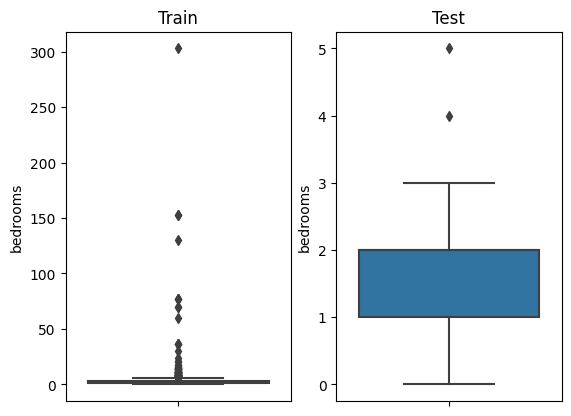

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.boxplot(df_train, y='bedrooms', ax=ax[0])
ax[0].set_title('Train')
sns.boxplot(df_test, y='bedrooms', ax=ax[1])
ax[1].set_title('Test')
plt.show()

# El maximo de Beedrooms en TEST es 5

In [13]:
print(len(df_train))


print(df_test.bedrooms.value_counts(dropna=False))  # Hay 3 con 0 beedrooms (revisar) Y 2 con 4 y 5. 
df_test[df_test.bedrooms>=4] #El de 4 tiene como maximo 5 ambientes. pareceria raro
df_test[df_test.bedrooms==5].description.values  #el de 5 si es raro
df_test[df_test.bedrooms==0]#.description.values  #Estos con 0 bedrooms parece que no es asi. Ademas tienen mas rooms, no son monoambientes por la desct
# (df_train.bedrooms>50).sum() #hay 10 con bedrooms >50
# (df_train.bedrooms>7).sum() #hay 76 con bedrooms >7

# df_train[df_train.bedrooms>6]
df_train[df_train.bedrooms==0].rooms.value_counts() #hay algunos que tienen 1 solo rooms, y otros mas raros con +1 rooms. 
#df_test[df_test.rooms==1] # no hay rooms = 1 en test 
df_test[(df_test.description.str.contains('Monoambiente'))] #hay monoambientes en test tambien. Voy a tener que considerar a los de train entonces

### DECISION: (1) Cortar lo bedrooms de TRAIN mayores a 4 (2) Poner en NULO los bedrooms ==0 y >=4 en TEST. (3) Poner en NULO los bedrooms = 0 en TRAIN

df_test.loc[df_test.bedrooms>=4, 'bedrooms'] = np.nan
df_test.loc[df_test.bedrooms==0, 'bedrooms'] = np.nan
df_train.loc[df_train.bedrooms==0, 'bedrooms'] = np.nan
df_train = df_train[~(df_train.bedrooms>4)]

print(len(df_train))

124532
2.0    2463
1.0    2444
NaN    1065
3.0      23
0.0       3
5.0       1
4.0       1
Name: bedrooms, dtype: int64
123524


In [ ]:
df_train.bedrooms.value_counts()

1.0    33121
2.0    26904
3.0    17890
4.0     3952
Name: bedrooms, dtype: int64

In [ ]:
df_test[df_test.bedrooms>=3] #El de 4 no parece ser raro


### ROOMS

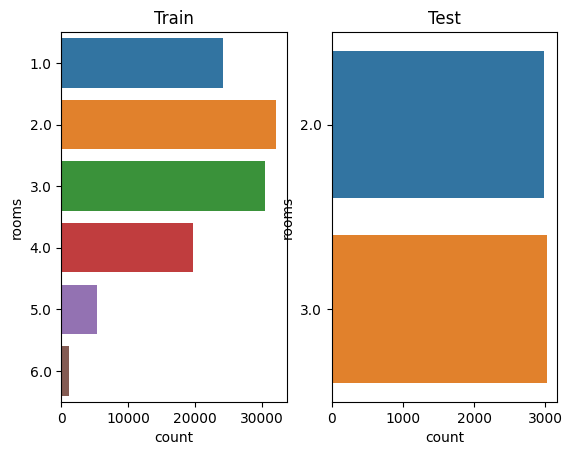

In [ ]:
# GRAFICO
fig, ax = plt.subplots(ncols=2)
sns.countplot(df_train, y='rooms', ax=ax[0])
ax[0].set_title('Train')
sns.countplot(df_test, y='rooms', ax=ax[1])
ax[1].set_title('Test')
plt.show()

In [14]:
print(len(df_train))


# No hay nulos en test, si en train
df_test[df_test.rooms>2]
#df_test[(df_test.description.str.contains('6 amb'))].description.values #en test hay de hasta 6 ambientes.

# df_train.rooms.value_counts(dropna=False, normalize=True).sort_index() #Hay algunons con muchos rooms en train
# df_train[df_train.rooms>6] #hay 608 filas con + 6 rooms #estos los voy a eliminar

# porque hay menos rooms que bedrooms en test?
#df_test[df_test.rooms<=df_test.bedrooms]#.description.values #por ahora poner en nulo los rooms que son menores que los bedrooms. Despues estan los que tienen igual rooms y bedrooms. Estos habria que imputarlos con text mining

##CONCLUSION: Los maximos ambientes que hay en test son 6, entonces, no deberia tener mas de 6 ambientes en train. Los rooms del test estan mal (los del test tambien entonces), pero tampoco se puede confiar en los bedrooms (hay algunos que tienen mas bedrooms que rooms). Por ahora poner en nulo los rooms que tienen menos que los bedrooms (en train y test) . Pero lo ideal seria sacar los valores de test mining
## DECISION:  (1) sacar los de train con +6 ambientes (2) Poner ne nulos los rooms que son menores que los bedrooms, en train y test. (3) habria que despues analizar los valores con text mining e imputar todos, hay cosas raras

df_train = df_train[~(df_train.rooms>6)]
df_test.loc[(df_test.rooms)<(df_test.bedrooms), 'rooms'] = np.nan
df_train.loc[(df_train.rooms)<(df_train.bedrooms), 'rooms'] = np.nan

print(len(df_train))


123524
122962


In [ ]:
pd.DataFrame({'Train': df_train.rooms.value_counts(normalize=True, dropna=False), 'Test':df_test.rooms.value_counts(normalize=True, dropna=False)})


,Train,Test
1.0,0.198532,NaN
2.0,0.262844,0.482000
3.0,0.251080,0.490833
4.0,0.163163,NaN
5.0,0.040725,NaN
6.0,0.008335,NaN
NaN,0.075321,0.027167


### Bathrooms

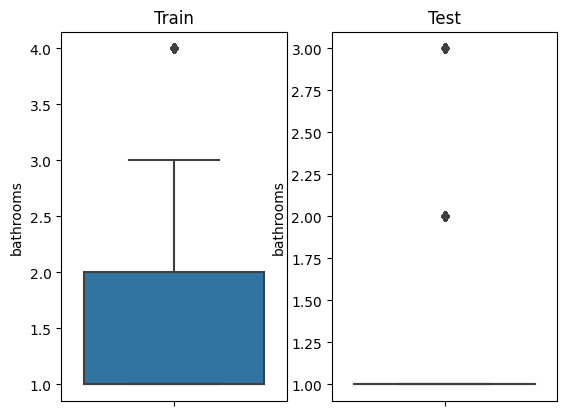

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.boxplot(df_train, y='bathrooms', ax=ax[0])
ax[0].set_title('Train')
sns.boxplot(df_test, y='bathrooms', ax=ax[1])
ax[1].set_title('Test')
plt.show()

In [15]:
print(len(df_train))


df_train[df_train.bathrooms>4] #hay 542 con mas de 4 baños. Los baños estan mal, porque no puedo tener mas baños que rooms y bedrooms. A estos se los podria poner en nulo
df_train[((df_train.bathrooms)>(df_train.rooms)) & ((df_train.bathrooms)>(df_train.bedrooms)) ] #hay casos raros en los que tiene 4 ambientes y dice 2 ambientes y 1 habitacion (parecen que fue mal cargado, esto se resolveria con text mining)

df_test[((df_test.bathrooms)>(df_test.rooms)) & ((df_test.bathrooms)>(df_test.bedrooms)) ] 
df_test[((df_test.bathrooms)>(df_test.rooms)) & ((df_test.bathrooms)>(df_test.bedrooms)) ]

## Decision: POnern en nulos cuando hay mas room y habitaciones que baños. Tambien saco lo que tienen 5 y 6 baños en train (logica de que el maximo de rooms es 6 en train..)

df_test.loc[(~((df_test.bathrooms)<=(df_test.rooms))) & (~((df_test.bathrooms)<=(df_test.bedrooms))),'bathrooms' ] = np.nan  #esto esta asi porque los nulos no entran en la condicion si no
df_train.loc[(~((df_train.bathrooms)<=(df_train.rooms))) & (~((df_train.bathrooms)<=(df_train.bedrooms))),'bathrooms' ] = np.nan
df_train = df_train[~(df_train.bathrooms>=5)]

print(len(df_train))


122962
122677


In [ ]:
pd.DataFrame({'Train': df_train.bathrooms.value_counts(normalize=True, dropna=False), 'Test':df_test.bathrooms.value_counts(normalize=True, dropna=False)})
#df_test.bathrooms.value_counts(dropna=False)



,Train,Test
1.0,0.616636,0.731167
2.0,0.198171,0.204500
3.0,0.058348,0.022667
4.0,0.016442,NaN
NaN,0.110404,0.041667


### Surface Total

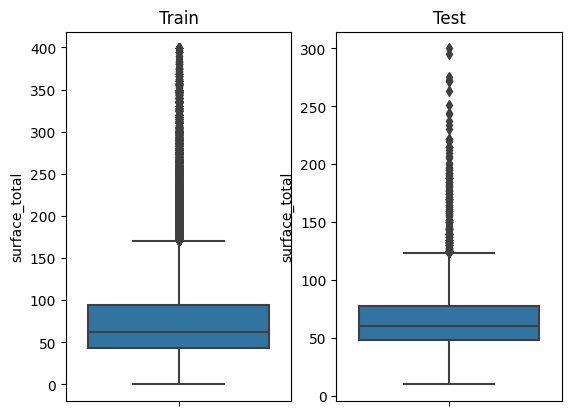

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.boxplot(df_train, y='surface_total', ax=ax[0])
ax[0].set_title('Train')
sns.boxplot(df_test, y='surface_total', ax=ax[1])
ax[1].set_title('Test')
plt.show()

In [77]:
print(len(df_train))


print((df_test.surface_total>300).sum() ) #son 13 los casos en queo tienen mal la surface (son dptos de 3,4,5 ambients)
df_test[df_test.surface_total>300].title.values
# df_train[df_train.surface_total>300].description.values
# (df_train.surface_total>400).sum()

# Esto es muy dificl de determinar Voy a poner como nulos los 13 de test que tiene mas de 300mts que no parece sensatos con 3 ambienes. Ademas no dice nada en el description
df_test.loc[df_test.surface_total>300,'surface_total' ] = np.nan 
df_train = df_train[~(df_train.surface_total>=500)]
df_train = df_train[~(df_train.surface_total<10)]

print(len(df_train))


120969
0
120959


### Surface Covered

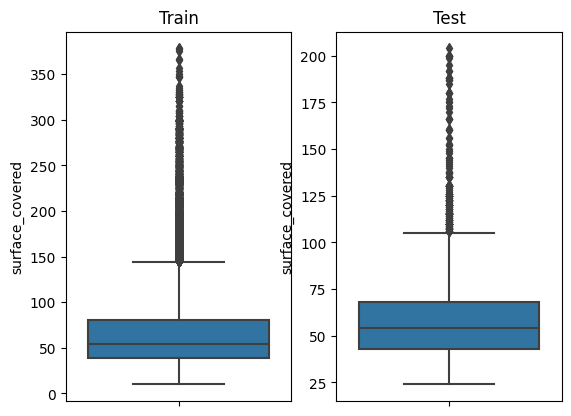

In [80]:
fig, ax = plt.subplots(ncols=2)
sns.boxplot(df_train, y='surface_covered', ax=ax[0])
ax[0].set_title('Train')
sns.boxplot(df_test, y='surface_covered', ax=ax[1])
ax[1].set_title('Test')
plt.show()

In [79]:


print(len(df_train))

print((df_test.surface_covered>300).sum() ) #son 13 los casos en queo tienen mal la surface (son dptos de 3,4,5 ambients)
print((df_train.surface_covered>400).sum() ) #son 13 los casos en queo tienen mal la surface (son dptos de 3,4,5 ambients)

df_test[df_test.surface_covered>300].description.values


# # Esto es muy dificl de determinar Voy a poner como nulos los 13 de test que tiene mas de 300mts que no parece sensatos con 3 ambienes. Ademas no dice nada en el description
df_test.loc[df_test.surface_covered>300,'surface_covered' ] = np.nan 
df_train = df_train[~(df_train.surface_covered>=400)]
df_train = df_train[~(df_train.surface_covered<10)]



print(len(df_train))


120959
0
0
120947


In [76]:
df_test[df_test.surface_covered<10]
df_test[df_test.surface_total<10]

#df_train[df_train.surface_covered<10]
#df_train[df_train.surface_total<10]

,start_date,end_date,longitud,latitud,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,end_date_null,date_Q
id,,,,,,,,,,,,,,,,,,,,
71406,2019-12-17,NaT,-58.529257,-34.652352,Capital Federal,Liniers,NaN,NaN,1.0,1.0,NaN,1.0,86000.0,USD,NaN,Av General Paz 1200 - Dpto. 2 Amb C/ Balcon - ...,EXCELENTE DEPARTAMENTO EN 1° PISO POR ESCALERA...,Departamento,1,2019Q4
77849,2019-10-28,2019-11-16,-57.958771,-34.918562,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,NaN,NaN,NaN,NaN,8.0,20000.0,USD,NaN,Cochera ideal para Abogado,Corredor Responsable: Marcelo Di Girolamo - C....,PH,0,2019Q4
93663,2020-04-26,NaT,-58.451948,-34.629611,Capital Federal,Caballito,NaN,NaN,2.0,2.0,64.0,7.0,215000.0,USD,NaN,Venta Departamento 3 Ambientes,VENTA - Departamento 3 ambientes - Caballito-U...,Departamento,1,2020Q2
125175,2019-12-09,2020-03-01,-58.399955,-34.627362,Capital Federal,San Cristobal,NaN,NaN,2.0,2.0,NaN,1.0,125000.0,USD,NaN,duplex en San Miguel,"Duplex tres ambientes. Impecable en Complejo ""...",Departamento,0,2019Q4
260292,2020-07-24,2020-07-29,-58.430159,-34.602911,Capital Federal,Almagro,NaN,NaN,NaN,NaN,NaN,1.0,85000.0,USD,NaN,"Departamento en Lambaré al 900, Capital Federa...",Tour Virtual: IMPORTANTE: 1) Recorre la...,Departamento,0,2020Q3
473371,2019-07-06,2019-10-25,-58.411316,-34.596583,Capital Federal,Palermo,NaN,NaN,1.0,1.0,28.0,1.0,86925.0,USD,NaN,OPORTUNIDAD!!! IDEAL INVERSORES MONOAMBIENTE E...,HALL DE ENTRADAImportante acceso Carpintería e...,Departamento,0,2019Q3
484364,2020-03-08,NaT,-58.489092,-34.635478,Capital Federal,Velez Sarsfield,NaN,NaN,1.0,1.0,NaN,1.0,120000.0,USD,NaN,Departamento Venta en Pozo,EN EL BARRIO DE FLORESTA. CONSTA DE 9 P EN PH ...,Departamento,1,2020Q1
838442,2020-03-07,2020-03-08,-58.392277,-34.587882,Capital Federal,Recoleta,NaN,NaN,NaN,NaN,NaN,1.0,23000.0,USD,Mensual,Venta Bóveda Cementerio Recoleta,BÓVEDA RECICLADA CEMENTERIO RECOLETA<br><br>Ub...,Departamento,0,2020Q1
838625,2020-03-07,NaT,-58.433789,-34.626619,Capital Federal,Caballito,NaN,NaN,NaN,NaN,NaN,9.0,33000.0,USD,NaN,Cochera Fija a Estrenar en Marzo 2020,Emprendimiento Inmobiliario Ubicado en el Cora...,Departamento,1,2020Q1


## Relacion entre medidas

In [38]:
df_train.isna().sum()

start_date              0
end_date            23060
longitud            10287
latitud             10226
l2                      0
l3                   5376
l4                 113357
rooms               10089
bedrooms            41389
bathrooms           13469
surface_total       28691
surface_covered     26951
price                3745
currency             4397
price_period        78959
title                  12
description             1
property_type           0
end_date_null           0
date_Q                  0
dtype: int64

In [60]:
print(df_train.loc[df_train['surface_covered']>df_train['surface_total'],['surface_covered','surface_total' ]].shape) #729
print(df_test.loc[df_test['surface_covered']>df_test['surface_total'],['surface_covered','surface_total' ]].shape) #729

print(df_train[(df_train['surface_covered']/df_train['rooms']>=70)].shape) #538
print(df_train[(df_train['surface_covered']/df_train['rooms']<8)].shape) #87


print(df_test.loc[(df_test['surface_covered']/df_test['rooms'])>=70].shape )#31
print(df_test.loc[(df_test['surface_covered']/df_test['rooms'])<8].shape )#1


(0, 2)
(0, 2)
(0, 20)
(0, 20)
(0, 20)
(0, 20)


In [81]:
# casos en que la super cuvierta es mayor que la total

print(len(df_train))

# Superficie Mal
df_train.loc[df_train['surface_covered']>df_train['surface_total'], 'surface_total' ] = np.nan
df_test.loc[df_test['surface_covered']>df_test['surface_total'], 'surface_total' ] = np.nan

print(len(df_train))

# corregioms superficies raras

print(len(df_train))

df_train = df_train[~(df_train['surface_covered']/df_train['rooms']>=70)]
df_train = df_train[~(df_train['surface_covered']/df_train['rooms']<=8)]

df_test.loc[(df_test['surface_covered']/df_test['rooms'])>=70,'surface_covered']= np.nan
df_test.loc[(df_test['surface_covered']/df_test['rooms'])<=8,'surface_covered']= np.nan

print(len(df_train))

120947
120947
120947
120947


## **Latitud y Longitud**

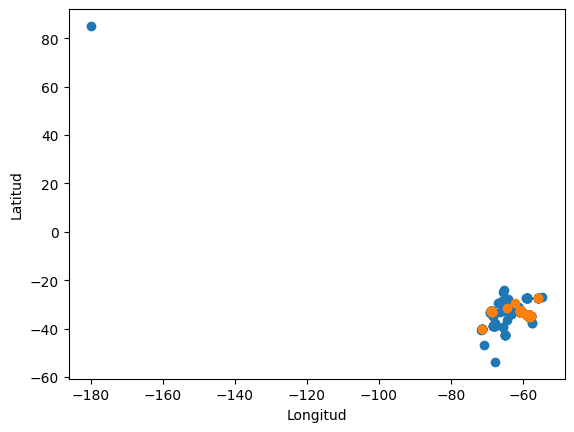

In [ ]:
#df_train[df_train['lon']>40]
plt.scatter(x=df_train['longitud'], y=df_train['latitud'])
plt.scatter(x=df_test['longitud'], y=df_test['latitud'])

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# plt.scatter(x=df_test['lon'], y=df_test['lat'])
# plt.show()

In [ ]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()
# df_train = df_train_copy.copy()
# df_test = df_test_copy.copy()

In [ ]:
#Sacamos los valores malos de Train/Test

print("Longitud Train", len(df_train))
print("Longitud Test", len(df_test))

df_train.loc[(df_train.latitud>-34) |  (df_train.latitud<-36), 'latitud' ] = np.nan
df_test.loc[(df_test.latitud>-34) |  (df_test.latitud<-36), 'latitud' ] = np.nan

df_train.loc[(df_train.longitud<-59) |  (df_train.longitud>-57) , 'longitud' ] = np.nan
df_test.loc[(df_test.longitud<-59) |  (df_test.longitud>-57) , 'longitud' ]  = np.nan

mask_train =df_train[['latitud','longitud','l3','l4']].isnull().sum(axis=1)
#df_train = df_train[mask<4] #hay 2,8mil filas que tienen nulos en todas. Eliminarlas
print((mask_train==4).value_counts()) #hay 209 casos del test que les voy a tener que poner cualquier cosa

mask_test =df_test[['latitud','longitud','l3','l4']].isnull().sum(axis=1)
print((mask_test==4).value_counts()) #hay 209 casos del test que les voy a tener que poner cualquier cosa

Longitud Train 120969
Longitud Test 6000
False    115677
True       5292
dtype: int64
False    5791
True      209
dtype: int64


# **IMPUTACION DE LOCACION**

## **Barrios Faltantes**

In [ ]:
print("Barrios faltantes en train:",df_train.l3.isnull().sum())
print("Barrios faltantes en train, cuando lat y long es null:",(df_train.l3.isnull()&df_train.latitud.isnull()&df_train.longitud.isnull()).sum())
print("Barrios faltantes en train, cuando lat y long no es null:",(df_train.l3.isnull()  & ~(df_train.latitud.isnull() | df_train.longitud.isnull())) .sum())


print("Barrios faltantes en test:",df_test.l3.isnull().sum())
print("Barrios faltantes en test, cuando lat y long es null:",(df_test.l3.isnull()&df_test.latitud.isnull()&df_test.longitud.isnull()).sum())
print("Barrios faltantes en test, cuando lat y long no es null:",(df_test.l3.isnull()  & ~(df_test.latitud.isnull() | df_test.longitud.isnull())) .sum())
#df_train[(df_train.l3.isnull()&df_train.latitud.isnull()&df_train.longitud.isnull())]

df_train['barrio_faltante'] = df_train.l3.isnull().astype(int)
df_test['barrio_faltante'] = df_test.l3.isnull().astype(int)

Barrios faltantes en train: 5372
Barrios faltantes en train, cuando lat y long es null: 5292
Barrios faltantes en train, cuando lat y long no es null: 57
Barrios faltantes en test: 211
Barrios faltantes en test, cuando lat y long es null: 209
Barrios faltantes en test, cuando lat y long no es null: 2


Hay pocos casos 59 en train y 2 en test en donde se pueda conocer el barrio por l lat y long. Lo quise hacer con knn y mice pero no acepta strings. Despues se vera si se puede mejorar

In [ ]:
# columnas_a_mirar = ['latitud','longitud','l3']
# mask_train = df_train.latitud.notnull()&df_train.longitud.notnull()
# mask_test = df_test.latitud.notnull()&df_test.longitud.notnull()

# ## imputo con MICE

# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# imp = IterativeImputer(max_iter=10, random_state=42)
# barrios_train_mice = imp.fit_transform(df_train.loc[mask_train,columnas_a_mirar])
# barrios_test_mice = imp.transform(df_train.loc[mask_test, columnas_a_mirar])

In [ ]:
## armamos un diccionario con los barrios
barrios_unicos = df_train.groupby('l3')['l3'].count().sort_values(ascending=False).index.values
barrios_unicos_minusucula = [x.lower() for x in barrios_unicos]

dictionario = dict(zip(barrios_unicos, barrios_unicos_minusucula))
dictionario['Centro / Microcentro'] = 'microcentro' #remplazamos el valor de centro/micro
print(dictionario)

## imputamos en los df
for dataframe in [df_train,df_test]:
  
  dataframe['title_mas_description'] = dataframe['title']+" "+dataframe['description']
  dataframe['title_mas_description'] = dataframe['title_mas_description'] .str.lower() #ponemos la desc en minuscula
  dataframe['title_mas_description'].fillna('sin descripcion', inplace=True)  #ponemos en nulo los nan
  
  for replace_value, search_value in dictionario.items():
    mask = (dataframe.title_mas_description.str.contains(search_value)) & (dataframe.l3.isnull())
    dataframe.loc[mask,'l3']=replace_value

## ponemos los desconocidos como Barrio Desconocido

for dataframe in [df_train,df_test]:
  dataframe.loc[dataframe.l3.isnull(),'l3']='Barrio Desconocido'



{'Palermo': 'palermo', 'Almagro': 'almagro', 'Villa Crespo': 'villa crespo', 'Belgrano': 'belgrano', 'Caballito': 'caballito', 'La Plata': 'la plata', 'Recoleta': 'recoleta', 'Villa Urquiza': 'villa urquiza', 'Balvanera': 'balvanera', 'Barrio Norte': 'barrio norte', 'Flores': 'flores', 'Colegiales': 'colegiales', 'Nuñez': 'nuñez', 'Villa Devoto': 'villa devoto', 'Villa del Parque': 'villa del parque', 'San Cristobal': 'san cristobal', 'Puerto Madero': 'puerto madero', 'Saavedra': 'saavedra', 'Parque Centenario': 'parque centenario', 'San Telmo': 'san telmo', 'Liniers': 'liniers', 'Boedo': 'boedo', 'Monserrat': 'monserrat', 'Parque Chacabuco': 'parque chacabuco', 'Floresta': 'floresta', 'San Nicolás': 'san nicolás', 'Villa Luro': 'villa luro', 'Chacarita': 'chacarita', 'Congreso': 'congreso', 'Mataderos': 'mataderos', 'Paternal': 'paternal', 'Retiro': 'retiro', 'Barracas': 'barracas', 'Villa Pueyrredón': 'villa pueyrredón', 'Once': 'once', 'Coghlan': 'coghlan', 'Las Cañitas': 'las cañit

In [ ]:
df_train[df_train.barrio_faltante==1].l3.value_counts(dropna=False)

Barrio Desconocido      4331
Belgrano                 118
Palermo                  115
Liniers                   74
Villa Crespo              72
Almagro                   64
Abasto                    60
Villa Luro                59
Caballito                 57
Once                      53
La Plata                  47
Mataderos                 39
Centro / Microcentro      30
Villa Urquiza             24
Colegiales                23
Boca                      15
Tribunales                14
Pompeya                   13
Retiro                    12
Boedo                     12
Villa Devoto              11
Saavedra                  11
Flores                    11
Parque Chacabuco           9
Villa Santa Rita           9
Barrio Norte               8
Recoleta                   8
Puerto Madero              7
Nuñez                      7
Las Cañitas                7
Congreso                   7
Balvanera                  6
San Telmo                  6
Parque Chas                6
Villa del Parq

## Latitud y Longitud Desconocida

In [ ]:
print("Lat-Lon faltantes en train:",((df_train.latitud.isnull())&(df_train.longitud.isnull())).sum())
print("Lat-Lon faltantes en train con barrio desconocido:",((df_train.latitud.isnull())&(df_train.longitud.isnull())&(df_train.l3=='Barrio Desconocido')).sum())

print("Lat-Lon faltantes en test:",((df_test.latitud.isnull())&(df_test.longitud.isnull())).sum())
print("Lat-Lon faltantes en test con barrio desconocido:",((df_test.latitud.isnull())&(df_test.longitud.isnull())&(df_test.l3=='Barrio Desconocido')).sum())

df_train['latitud_faltante'] = df_train.latitud.isnull().astype(int)
df_test['latitud_faltante'] = df_test.latitud.isnull().astype(int)

df_train['longitud_faltante'] = df_train.longitud.isnull().astype(int)
df_test['longitud_faltante'] = df_test.longitud.isnull().astype(int)

Lat-Lon faltantes en train: 11288
Lat-Lon faltantes en train con barrio desconocido: 4279
Lat-Lon faltantes en test: 503
Lat-Lon faltantes en test con barrio desconocido: 170


In [ ]:
#agrupamos los dataframes
df_concatenado = pd.concat([df_train,df_test])
idx_train = df_train.index
idx_test = df_test.index

#agrupamos la info y le ponemos a cada valor la mediana de su grupo
grouped_data = df_concatenado.groupby('l3')['latitud', 'longitud'].transform('median')

# Rellenar los valores faltantes en "latitud" y "longitud" con las medianas correspondientes
df_concatenado['latitud'].fillna(grouped_data['latitud'], inplace=True)
df_concatenado['longitud'].fillna(grouped_data['longitud'], inplace=True)

# # Rellenamos los valores de Lat y Long con Barrios Desconocido con la mediana gral
df_concatenado.loc[df_concatenado.l3=='Barrio Desconocido','latitud'] = df_concatenado.latitud.median()
df_concatenado.loc[df_concatenado.l3=='Barrio Desconocido','longitud'] = df_concatenado.longitud.median()

# Separamos los datasets devuelta
df_train=df_concatenado.loc[idx_train]
df_test=df_concatenado.loc[idx_test]

<ipython-input-152-ccf7954cfa31>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = df_concatenado.groupby('l3')['latitud', 'longitud'].transform('median')


# DUPLICADOS

In [ ]:
df_train.columns

Index(['start_date', 'end_date', 'longitud', 'latitud', 'l2', 'l3', 'l4',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'price_period', 'title', 'description',
       'property_type', 'end_date_null', 'date_Q', 'barrio_faltante',
       'title_mas_description', 'latitud_faltante', 'longitud_faltante'],
      dtype='object')

In [ ]:
## ELIMINAMOS DUPLICADOS
variables_a_mirar = [ 'longitud', 'latitud', 'l2', 'l3', 'l4',  'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'price_period', 'title',   'property_type']

print(df_train.shape)
df_train.duplicated(variables_a_mirar)
df_train.drop_duplicates(keep='last', subset = variables_a_mirar, inplace=True)
#df_train[df_train.description.duplicated()].sort_values(by='description')
print(df_train.shape)

(120969, 24)
(88964, 24)


# **PRUEBA DE LAT-LONG Y PTOS AL AZAR**

In [ ]:
df_copy=df_train.copy()
df_copy.shape

(88964, 22)

In [ ]:
import random
from math import radians, sin, cos, sqrt, atan2

# Define the boundary coordinates of Buenos Aires area
min_lat = -34.7055; max_lat = -34.5217; min_lon = -58.5275; max_lon = -58.3357

# Generate N random points within the defined boundary.  N = 500  # Number of random points
random.seed(42)
random_points = []
N=750
for _ in range(N):
    lat = random.uniform(min_lat, max_lat)
    lon = random.uniform(min_lon, max_lon)
    random_points.append((lat, lon))


# Function to calculate the distance between two latitude-longitude pairs using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth's radius in kilometers

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# # Find the nearest random point for each given latitude-longitude pair

def find_nearest_point(row):
    lat = row['latitud']
    lon = row['longitud']
    nearest_point = min(random_points, key=lambda p: calculate_distance(lat, lon, p[0], p[1]))  
    return nearest_point
    #It is a lambda function that takes an element p from random_points and calculates the distance between the given latitude-longitude pair (lat, lon) and the latitude-longitude pair of p using the calculate_distance function.

# Add a column with the nearest random point to the given points DataFrame
df_copy['Nearest_Rndm_Point'] = df_copy.apply(find_nearest_point, axis=1)



KeyboardInterrupt: ignored

In [ ]:
x = df_copy.groupby('Nearest_Rndm_Point')['price'].agg(['median','count'])
x.reset_index()['count'].value_counts(normalize=True).sort_index()

In [ ]:
df_copy.groupby('Nearest_Rndm_Point')['price'].agg(['median','count']).sort_values(by='count',ascending=False)

,median,count
Nearest_Rndm_Point,,
"(-34.59861008341591, -58.43672863825593)",106013.5,5438
"(-34.70363422516617, -58.34566159758237)",83000.0,5054
"(-34.596132547434486, -58.397994232218736)",239500.0,1758
"(-34.56558597968908, -58.4547835918548)",205000.0,1739
"(-34.586051240336126, -58.42298022402031)",190000.0,1633
...,...,...
"(-34.567841570683605, -58.4183260879406)",730000.0,1
"(-34.56674145019375, -58.505669801944464)",120000.0,1
"(-34.55672668206262, -58.52625353789375)",63000.0,1


In [ ]:

""""
NO ME ESTA FUNCIONANDO!!!! HAY MUCHOS PUNTOS CON 1 SOLA PROPIEDAD. OTROS CON UN MONTON
TENDRIA QUE MEJORAR DONDE PONGO LOS PUNTOS
OTRA ALTERNATIVA ES HACER UN MUESTREO ESTATIFCIADO POT ZONAS Y ESCOGUER PUNTOS DE ESAS ZONAS. NO PARECE QUE GENERARLSO AL AZAR VAYAN A SERVIR
"""


# IMPUTACION DE VALORES FALTANTES

In [ ]:
columnas_a_mirar = ['rooms','bedrooms','bathrooms','surface_total','surface_covered']
df_test[columnas_a_mirar].isna().sum(axis=1).value_counts(dropna=False) # de test, hay 15 filas que tienen nulos en 4 de los 5 atributos...
df_train[columnas_a_mirar].isna().sum(axis=1).value_counts(dropna=False) 

## SACAMOS LOS DE TRAIN QUE TIENEN POR LO MENOS 4 de la 5 columnas en NULL
df_train = df_train[(df_train[columnas_a_mirar].isna().sum(axis=1) <4)]


In [ ]:
df_train.shape

(85078, 24)

In [ ]:
shadow_nans_imputados_train = df_train[columnas_a_mirar].isna().astype(int)
shadow_nans_imputados_train.columns = ['rooms_na', 'bedrooms_na','bathrooms_na','surface_total_na','surfaced_covered_na']
df_train = pd.concat(objs = [df_train,shadow_nans_imputados_train],  axis='columns')


In [ ]:
columnas_a_mirar_train = df_train[columnas_a_mirar]
columnas_a_mirar_test = df_test[columnas_a_mirar]

columnas_a_mirar_train_norm = ((columnas_a_mirar_train-columnas_a_mirar_train.mean())/columnas_a_mirar_train.std())
columnas_a_mirar_test_norm = ((columnas_a_mirar_test-columnas_a_mirar_train.mean())/columnas_a_mirar_train.std())

columnas_a_mirar_test_norm.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
id,,,,,
556713,0.345273,0.148291,0.861545,NaN,NaN
192912,0.345273,0.148291,0.861545,-0.023280,-0.018740
238224,-0.504338,NaN,-0.596286,-0.354916,-0.306901
257134,-0.504338,-0.998353,-0.596286,-0.081804,-0.499008
521738,0.345273,0.148291,-0.596286,-0.237868,-0.090780


In [ ]:
### CON MICE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=42)  # tiene add_indicator
valores_sin_faltantes_train = imp.fit_transform(df_train[columnas_a_mirar]).round()
valores_sin_faltantes_test = imp.transform(df_test[columnas_a_mirar]).round()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=7, weights="distance")
valores_sin_faltantes_train_knn = imp.fit_transform(columnas_a_mirar_train_norm)
valores_sin_faltantes_test_knn = imp.transform(columnas_a_mirar_test_norm)

np.savetxt("valores_sin_faltantes_train_knn.csv", valores_sin_faltantes_train_knn, delimiter=",")
np.savetxt("valores_sin_faltantes_test_knn.csv", valores_sin_faltantes_test_knn, delimiter=",")

# valores_sin_faltantes_train_knn = np.loadtxt("valores_sin_faltantes_train_knn.csv", delimiter=",")
# valores_sin_faltantes_test_knn = np.loadtxt("valores_sin_faltantes_test_knn.csv", delimiter=",")

print(valores_sin_faltantes_train_knn.shape)
print(valores_sin_faltantes_test_knn.shape)

(85078, 5)
(6000, 5)


In [ ]:
valores_sin_faltantes_train_knn_df = pd.DataFrame(valores_sin_faltantes_train_knn, columns=columnas_a_mirar_train.columns)
valores_sin_faltantes_train_knn_df = (valores_sin_faltantes_train_knn_df*columnas_a_mirar_train.std()+columnas_a_mirar_train.mean()).round()

valores_sin_faltantes_test_knn_df = pd.DataFrame(valores_sin_faltantes_test_knn, columns=columnas_a_mirar_train.columns)
valores_sin_faltantes_test_knn_df = (valores_sin_faltantes_test_knn_df*columnas_a_mirar_train.std()+columnas_a_mirar_train.mean()).round(0)

In [ ]:
# soluc_imputador =pd.DataFrame(valores_sin_faltantes_train, columns = df_train[columnas_a_mirar].columns)
# soluc_knn =pd.DataFrame(valores_sin_faltantes_train_knn, columns = df_train[columnas_a_mirar].columns)

# for col in df_train[columnas_a_mirar].columns:
#   to_print = pd.DataFrame({col: df_train[col].value_counts(dropna=False), 'imputador': soluc_imputador[col].value_counts(dropna=False), 'knn': soluc_knn[col].value_counts(dropna=False)})
#   print(to_print, "\n")

In [ ]:
# ## comparacion

# #print(valores_sin_faltantes_train[1]) ##porque le puso 0 a bedrooms?????
# print(valores_sin_faltantes_train_knn_df.iloc[4])
# print(df_train.iloc[4][columnas_a_mirar])

In [ ]:
df_train.loc[:,columnas_a_mirar] = valores_sin_faltantes_train_knn_df.values
df_test.loc[:,columnas_a_mirar] = valores_sin_faltantes_test_knn_df.values

In [ ]:
### revisar QUE RTAN BIEN SE IMPUTA!!!!!


print(len(df_train))

print(df_train.loc[df_train['surface_covered']>df_train['surface_total'], 'surface_total' ].shape)
print(df_test.loc[df_test['surface_covered']>df_test['surface_total'], 'surface_total' ].shape)

print(df_train[(df_train['surface_covered']/df_train['rooms']>=60)].shape)
print(df_train[(df_train['surface_covered']/df_train['rooms']<=8)].shape)

print(len(df_train))

85078
(0,)
(0,)
(0, 29)
(0, 29)
85078


# **CHECKPOINT**
Guardamos el df para evitar correr todo de nuevo

In [ ]:
df_train.to_csv('df_train_checkpoint_23_5.csv')
df_test.to_csv('df_test_checkpoint_23_5.csv')


In [ ]:
df_train_ = pd.read_csv('df_train_checkpoint_23_5.csv')
df_test_  = pd.read_csv('df_test_checkpoint_23_5.csv')

FileNotFoundError: ignored

# **TEXT MINING**

In [ ]:
# sample_description = df_train['description'].sample(20000)
# sample_description=sample_description.dropna() #si es na trae problema
# sample_description.apply(type).value_counts()


<class 'str'>    19999
Name: description, dtype: int64

In [ ]:
df_train['description'] = df_train['description'].str.lower()
df_train['description'] = df_train['description'].fillna('SIN DESCRIPCION')

sample_description = df_train['description'].sample(10000)

sample_description=sample_description.dropna() #si es na trae problema
#sample_description.apply(type).value_counts()

import spacy
import locale

locale.getpreferredencoding = lambda: "UTF-8"
#! spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm") 

#sample_description_tok = sample_description.apply(lambda texto: [token.text for token in nlp(texto)]) #tokenizamos (dividimos en tokens el texto)
sample_description_tok =sample_description.apply(lambda texto: [token.lemma_ for token in nlp(texto)]) #nos quedamos con los token lematizado (cada palabra a su raiz)
sample_description_tok_copy =sample_description_tok.copy()

In [ ]:
#m = {'morci': 'morcilla', 'chori': 'chorizo'} #se necesita tener un diccionario para esto. La normalizacion se puede hacer al ppio tambien
#df['comentario_tok'] = df['comentario_tok'].apply(lambda texto: [m.get(token, token) for token in texto]) #el get hace que si el token "comer" no esta, devuelva "comer". Si "morci" esta, devuelve "morcilla". 

sample_description_tok = sample_description_tok.apply(lambda texto: [token for token in texto if token not in (":", ",", ".", "!","*", "-", ")","(", ">", "<", "/")]) #les sacamos las puntuaciones

stopwords = nlp.Defaults.stop_words
stopwords.update(['habitacion', 'departamento','zona','zonas', 'le','el', 'en','del','br','y', 'ya', 'se','de','la','por',])  #con esto agregamos mas palabras a los stopwords

sample_description_tok= sample_description_tok.apply(lambda texto: [token for token in texto if token not in stopwords])
sample_description_tok =sample_description_tok.str.join(' ')

In [ ]:
sample_description_tok

id
846919    liniers yerbal 6300 cuadra rivadavia fonrouge ...
76577     dormitorio frente   living comedor   balcon co...
86603     importante ph tipo casa pleno corazon palermo ...
480342    ¡ oportunidad!<br><br tratar 3 ambiente balcón...
293404    1 ambiente divisible refaccionado   super lumi...
                                ...                        
989152    amplio luminoso departamento.departamento 3 do...
425698    excelente 3 piso monoambiente 35.80 m2 living-...
386459    venta monoambiente cocina baño completo palerm...
72051     piso 5 ambiente balcon frente comodo estar- co...
575018    divino semipiso edificio boutique exquisito 5 ...
Name: description, Length: 9999, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer(analyzer='word', min_df=0.01, max_df=0.6, strip_accents='ascii', max_features=2000)
vectorized_data = vectorizer.fit_transform(sample_description_tok)


In [ ]:
count_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out()) #con el index podemos ponerle el index del df original
x = count_df.sum().sort_values(ascending=False)
x.to_csv("coneto.csv")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer_2 = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.01, max_df=0.6, strip_accents='ascii', max_features=2000)
vectorized_data_2 = vectorizer_2.fit_transform(sample_description_tok)

count_df_2 = pd.DataFrame(vectorized_data_2.toarray(), columns=vectorizer_2.get_feature_names_out()) #con el index podemos ponerle el index del df original
x = count_df_2.sum().sort_values(ascending=False)
x.to_csv("coneto_2.csv")

In [ ]:


def crear_dummies(df_):
  df_['description'] = df_['description'].str.lower()
  df_['description'] = df_['description'].fillna('SIN DESCRIPCION')


  df_['gimnasio_fl']=df_.description.str.contains(' gimnasio| gym').astype('int')
  df_['piscina_fl']=(~df_.description.str.contains(' pileta de| pileta con'))&df_.description.str.contains(' piscin| pileta').astype('int')
  df_['spa_sauna_jacuzzi_fl']=df_.description.str.contains(' spa| sauna| jacu| yacu| pileta climatizada| pileta cubierta| cancha de tenis| cubierta climatizada| canchas de tenis| pileta privada| fitness center|penthouse| gym').astype('int') #ver lo de pilata/piscina climatizada
  df_['subte_metrobus_fl']=df_.description.str.contains(' subt| metrobus').astype('int')
  df_['seguridad_fl']=df_.description.str.contains(' seguridad| vigilancia').astype('int')
  df_['piso_flotante_fl']=df_.description.str.contains(' parquet| pisos de madera| piso de madera| flotante').astype('int')
  df_['balcon_fl']=df_.description.str.contains(' balcon').astype('int')
  df_['patio_fl']=df_.description.str.contains(' patio| jardin').astype('int')
  df_['dependencia_servicio_fl']=df_.description.str.contains(' dependencia').astype('int') #servicio
  df_['solarium_fl']=df_.description.str.contains(' solarium').astype('int')
  df_['terraza_fl']=df_.description.str.contains(' patio').astype('int')
  df_['parilla_quincho_fl']=df_.description.str.contains(' parrilla| quincho').astype('int')
  df_['iluminado_fl']=df_.description.str.contains(' luminoso| ilumina| luz en todo').astype('int')
  df_['monoambiente_fl']=df_.description.str.contains(' monoambiente').astype('int')
  df_['colectivo_fl']=df_.description.str.contains(' colectivo').astype('int')
  df_['nuevo_fl']=df_.description.str.contains(' nuevo| estrenar').astype('int')
  df_['plaza_fl']=df_.description.str.contains(' plaza').astype('int')
  df_['cochera_fl']=(~df_.description.str.contains(' cochera opcional'))&(df_.description.str.contains(' cochera')).astype('int') #cochera fijo
  df_['pozo_fl']=df_.description.str.contains(' construcci| pozo') .astype('int')
  df_['tren_fl']=df_.description.str.contains(' tren').astype('int')
  df_['sum_fl']=df_.description.str.contains(' sum| salon de uso| sala de uso').astype('int')
  df_['equipado']=df_.description.str.contains(' totalmente equipado').astype('int')
  df_['losa_radiante_fl']=df_.description.str.contains(' losa radiante').astype('int')
  
  return df_

df_train = crear_dummies(df_train)
df_test = crear_dummies(df_test)


In [ ]:
df_train[df_train.description.str.contains('totalmente equipado')].description.values

In [ ]:
df_train[(~df_train.description.str.contains('pileta de|pileta con'))].description.values[20:22]#.value_counts(dropna=False)[1:3]

array(['excelente departamento de dos ambientes con muy buena distribución, entre sus principales características podemos desatacar su impresionante luminosidad. departamento con amplias ventanas todas hacia el exterior. ambientes amplios, cocina integrada y a gas, caldera individual a gas. lugar para colocar el lavarropa. pisos porcelanato, placard, balcón corrido. propiedad única en el mercado, oportunidad!!!! el edificio cuenta con una interesante pileta, un sum amplio, parrilla y laundry. cel:. 15-  se deja constancia que las caracteristicas, medidas, expensas y superficies  consignadas son aproximadas, sujetos a verificación y/o ajuste. el precio del inmueble puede ser modificado sin previo aviso. fotos de carácter no contractual. las unidades publicadas están sujetas a disponibilidad.',
       'excelente departamento de dos ambientes, segundo piso por escalera, opcional cochera,  ubicado en el exclusivo barrio de palermo soho a mts de plaza armenia . unidad con muy buena iluminac

# **PRECIO / SUPERFICIE**

In [ ]:
variables_a_mirar = [ 'longitud', 'latitud', 'l2', 'l3', 'l4',  'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title',  'property_type']
df_train_copia = df_train.copy()
print(df_train.shape)
df_train.drop_duplicates(keep='last', subset = variables_a_mirar, inplace=True)
#df_train[df_train.description.duplicated()].sort_values(by='description')
print(df_train.shape)

(86073, 52)
(82674, 52)


In [ ]:
## Cantidad de NANS y en 0
print("%NANS:",round(df_train['price'].isna().sum()/len(df_train)*100,2))
print("%PRICE EN 0:",round(sum(df_train['price']==0)/len(df_test)*100,2))

## Los Eliminamos
df_train = df_train.dropna(subset=['price'])
df_train = df_train[df_train['price']>0]

%NANS: 1.89
%PRICE EN 0: 4.03


In [ ]:
df_train ['price_m2'] = df_train.price/ df_train.surface_covered

In [ ]:

p1 = df_train.price_m2.quantile(q=0.01)
p5 = df_train.price_m2.quantile(q=0.05)
p50 = df_train.price_m2.quantile(q=0.50)
p90 = df_train.price_m2.quantile(q=0.90)
p95 = df_train.price_m2.quantile(q=0.95)
p99 = df_train.price_m2.quantile(q=0.99)

print("Minimo:",df_train.price_m2.min())
print("Percentil 1:",p1)
print("Percentil 5:",p5)
print("Percentil 10:",p5)
print("Percentil 50:",p90)
print("Percentil 90:",p90)
print("Percentil 95:",p95)
print("Percentil 99:",p99)
print("Maximo:",df_train.price_m2.max())
df_train = df_train[df_train.price_m2<10000]


Minimo: 30.76923076923077
Percentil 1: 884.6153846153846
Percentil 5: 1328.3038379530917
Percentil 10: 1328.3038379530917
Percentil 50: 4333.333333333333
Percentil 90: 4333.333333333333
Percentil 95: 5208.333333333333
Percentil 99: 7696.721311475483
Maximo: 980000.0


<Axes: >

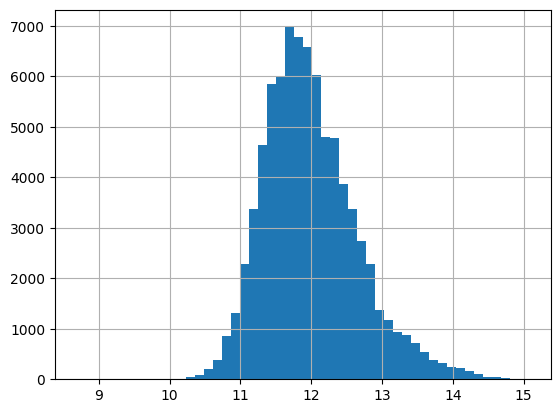

In [ ]:
#armamos los log
df_train['log_price'] = np.log(df_train.price)
df_train['log_price_m2'] = np.log(df_train.price_m2)

#df_train['price'].hist(bins=50)
#df_train['log_price_m2'].hist(bins=50)
df_train['log_price'].hist(bins=50)
#df_train['price_m2'].hist(bins=50)

### **Precio/m2 por barrio**

In [ ]:
df_train.l4.value_counts(dropna=False)
df_train.l3.value_counts(dropna=False) #revisar lo de palermo hollywood y otros

Palermo                 10212
Belgrano                 6964
Caballito                5478
La Plata                 4404
Recoleta                 4347
Almagro                  4040
Villa Urquiza            3237
Villa Crespo             3236
Barrio Desconocido       2825
Flores                   2380
Barrio Norte             2350
Balvanera                2292
Nuñez                    2213
Colegiales               1561
Villa Devoto             1328
Villa del Parque         1304
San Cristobal            1221
Puerto Madero            1167
Saavedra                 1146
San Telmo                1082
Liniers                   972
Boedo                     961
Parque Chacabuco          909
Monserrat                 876
Villa Luro                871
Floresta                  845
San Nicolás               794
Barracas                  741
Mataderos                 713
Retiro                    683
Congreso                  639
Villa Pueyrredón          636
Coghlan                   597
Chacarita 

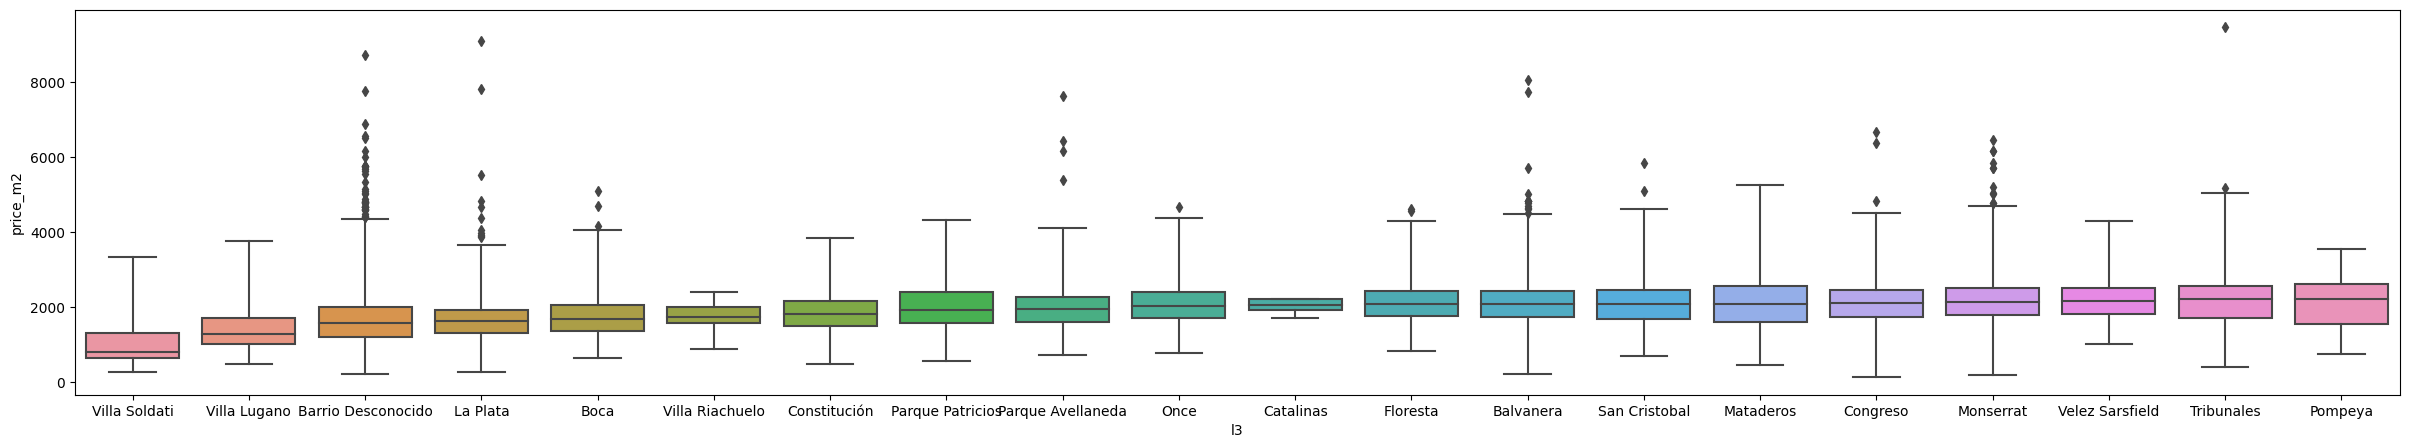

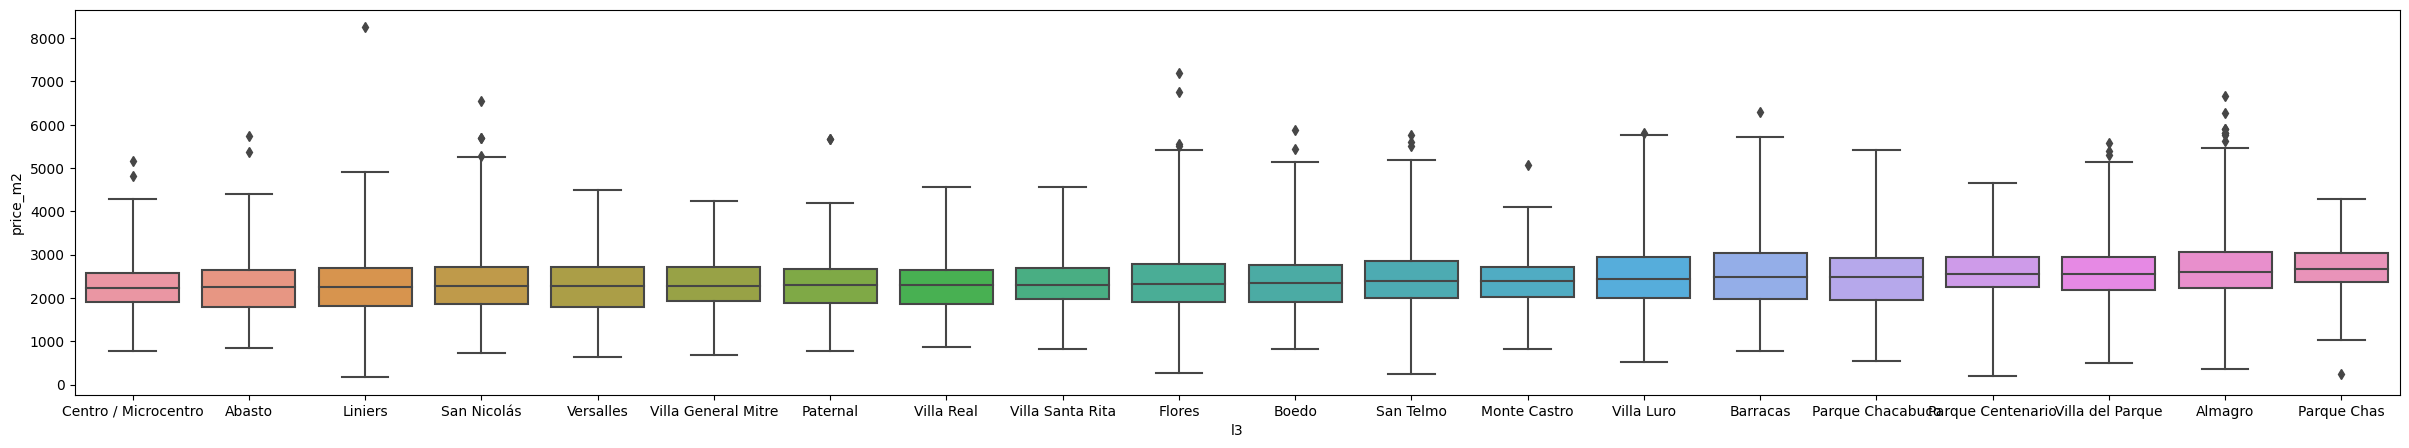

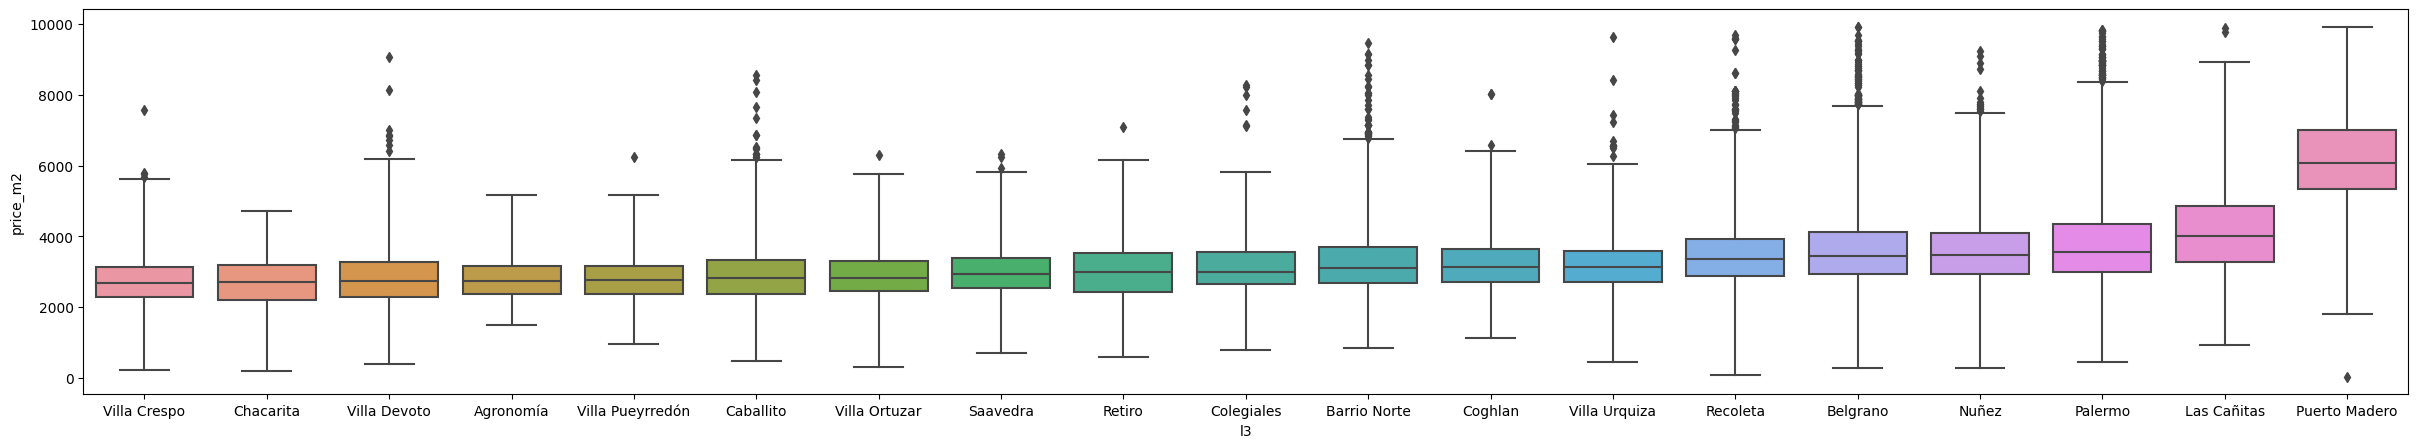

In [ ]:
precio_m2_barrios = df_train.groupby('l3')['price_m2'].agg({'median','count'}).sort_values(by='median') #hay 59 barrios. Voy a hacer boxplots por grupos

barrios1 = precio_m2_barrios[0:20].index.values
barrios2 = precio_m2_barrios[20:40].index.values
barrios3 = precio_m2_barrios[40:].index.values

#df_train[df_train.l3.isin(barrios1)]

for barrios in [barrios1,barrios2,barrios3]:
  sns.boxplot(df_train[df_train.l3.isin(barrios)], x='l3', y='price_m2', order =barrios ,whis=3) #hay dptos con precios muy raros. le puse whis 3 (donde los outliers quedan por fuera del IQRx3)
  fig = plt.gcf()
  fig.set_size_inches(30, 5)
  plt.show()

In [ ]:
#df_train[df_train.description.str.contains('corredor responsable: juan francisco carattino - cpi 5457contacto:')].l3.value_counts() #este hdp le puso la mitad del precio
df_train = df_train[~(df_train.description.str.contains('50% al boleto'))] 

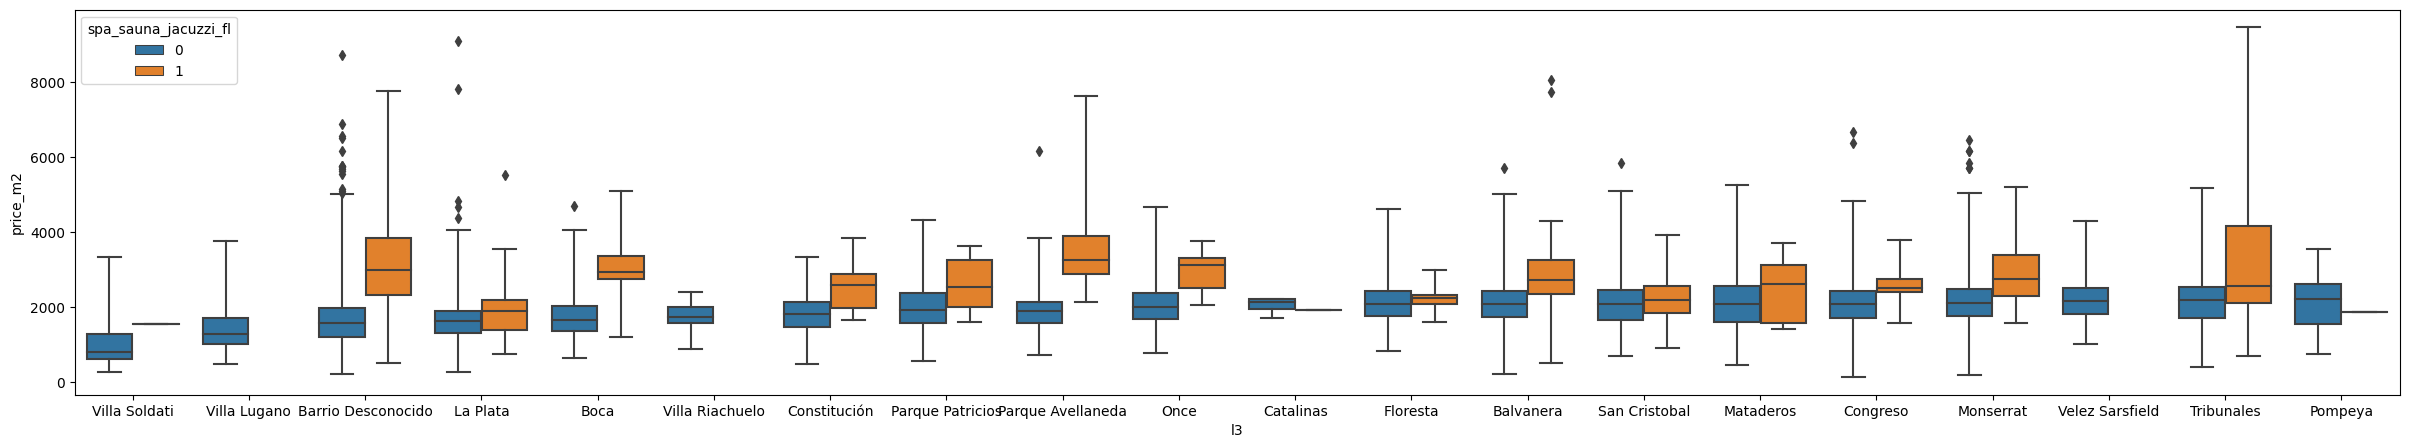

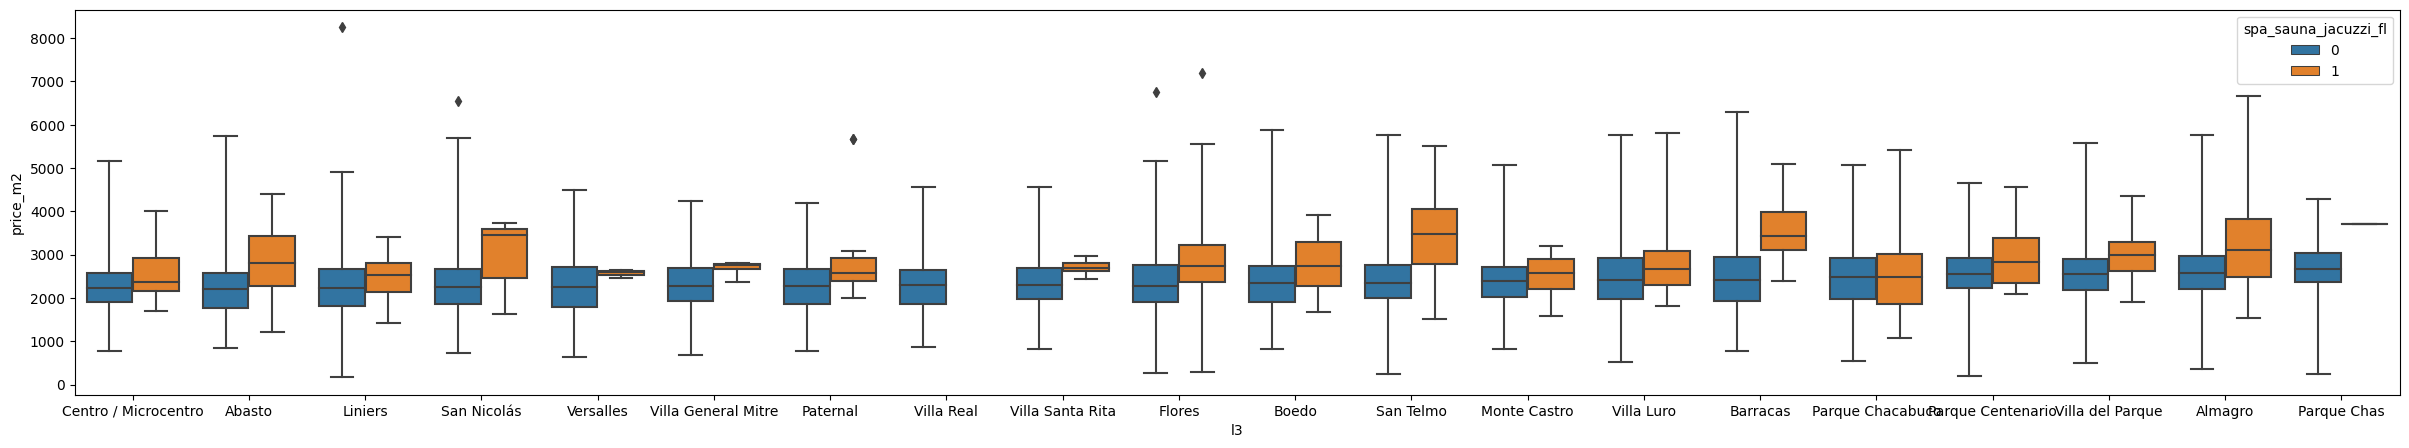

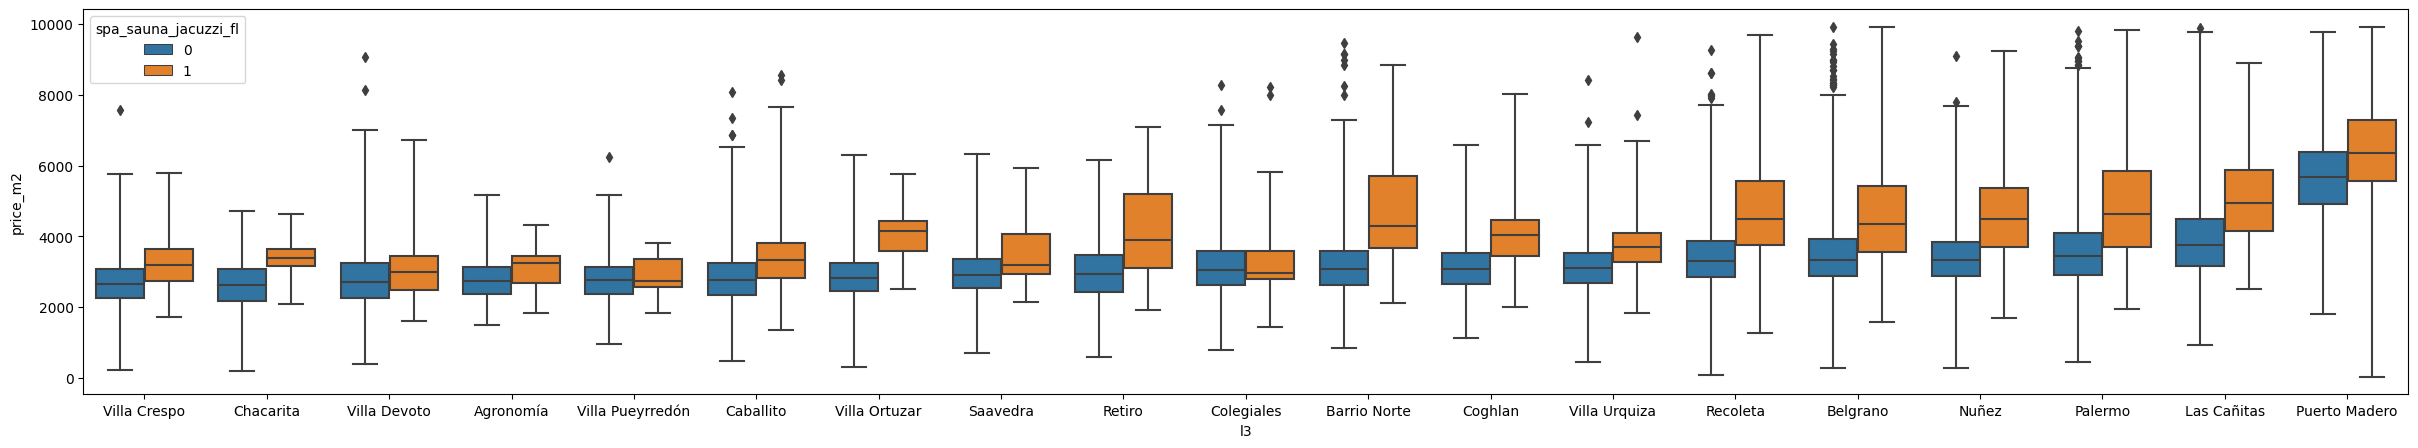

In [ ]:
barrios1 = precio_m2_barrios[0:20].index.values
barrios2 = precio_m2_barrios[20:40].index.values
barrios3 = precio_m2_barrios[40:].index.values

for barrios in [barrios1,barrios2,barrios3]:
  sns.boxplot(df_train[df_train.l3.isin(barrios)], x='l3', y='price_m2', hue='spa_sauna_jacuzzi_fl', order =barrios ,whis=4) #hay dptos con precios muy raros. le puse whis 3 (donde los outliers quedan por fuera del IQRx3)
  fig = plt.gcf()
  fig.set_size_inches(30, 5)
  plt.show()

In [ ]:
df_train.shape

(80365, 55)

In [ ]:
# Function to identify outliers based on IQR
def identify_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 +  4 * iqr
    outliers = group[(group < lower_bound) | (group > upper_bound)]
    return outliers

# Group by 'group_column' and identify outliers
outliers_barrio_comodities = df_train.groupby(['l3','spa_sauna_jacuzzi_fl'])['price_m2'].apply(identify_outliers) #este me da menos outliers
outliers_barrio = df_train.groupby(['l3'])['price_m2'].apply(identify_outliers)


print(outliers_barrio_comodities.shape)
print(outliers_barrio.shape)

df_train.loc[outliers_barrio_comodities.reset_index()['id'].values].l3.value_counts()

(141,)
(156,)


Belgrano                23
Palermo                 20
Villa Urquiza           10
Recoleta                10
Barrio Norte             8
Monserrat                7
Balvanera                6
Villa Crespo             4
Caballito                4
La Plata                 4
Saavedra                 3
Nuñez                    3
Almagro                  3
Villa Devoto             3
Villa Ortuzar            3
Chacarita                3
Congreso                 3
Villa Riachuelo          2
Villa del Parque         2
Parque Chas              2
Parque Avellaneda        2
Flores                   2
Colegiales               2
Boca                     2
Puerto Madero            1
Retiro                   1
San Nicolás              1
San Telmo                1
Tribunales               1
Liniers                  1
Villa General Mitre      1
Villa Pueyrredón         1
Centro / Microcentro     1
Parque Centenario        1
Name: l3, dtype: int64

In [ ]:
df_train.loc[outliers_barrio['Belgrano'].index.values].description.values
df_train.loc[outliers_barrio_comodities[('Belgrano','0')].index.values].sort_values(by='price_m2',ascending=False).description.values

# los 2,3,4 son iguales
#los 5,6,7 son iguales

#agregar cancha de tenis y pileta privada, penthouse,  fitness center

df_train.loc[outliers_barrio_comodities[('Palermo','0')].index.values].sort_values(by='price_m2',ascending=False).iloc[2:5].description.values


array(['hermoso departamento en venta en el chateau del libertador<br><br>4 ambientes<br>3 dormitorios + dependencia <br>dormitorio 1 y 2  con vestidor y baño en suite<br>reciclado a nuevo hace muy poco<br>piso bajo con vista al monumental<br>balcón amplio (patio)<br><br>pedime las fotos al whatsapp.  15- eliel',
       'hermoso departamento en venta en el chateau del libertador<br><br>4 ambientes<br>3 dormitorios + dependencia <br>dormitorio 1 y 2  con vestidor y baño en suite<br>reciclado a nuevo hace muy poco<br>piso bajo con vista al monumental<br>balcón amplio (patio)<br><br>pedime las fotos al whatsapp.  15- eliel',
       '\nventa de departamento 4 dormitorios en belgrano.\n\n\r\n\npiso alto en torre construcción aisenson. totalmente reciclado a nuevo con excelentes detalles de terminación. living y comedor. escritorio y playroom. 4 dormitorios. principal en suite con vestidor. 3 baños completos. toilette. comedor diario. lavadero. 2 dependencias. 2 cocheras fijas. pileta, parri

In [ ]:
df_train.loc[(df_train.l3=='Colegiales') & (df_train.spa_sauna_jacuzzi_fl==1)].price_m2.value_counts()

4000.000000    3
3888.888889    2
2870.370370    2
2750.000000    2
2853.846154    2
              ..
3333.333333    1
5487.804878    1
3114.285714    1
3395.348837    1
4916.666667    1
Name: price_m2, Length: 232, dtype: int64

In [ ]:
df_train[df_train.l3=='Colegiales'].sort_values('price_m2').price_m2.shape
df_train[df_train.l3=='Colegiales'].sort_values('price_m2').price_m2.value_counts().sort_values(ascending=False) #2692, 2750

df_train[(df_train.l3=='Colegiales') & (df_train.price_m2>=2692) & (df_train.price_m2<=2693)]  #tienen no duplicdos en fecha
#sacar duplicados sin considerar fecha (quedarse con la ultima)
#voy a sacar los duplicados sin fechas..

x = df_train[(df_train.l3=='Colegiales') & (df_train.price_m2>=2777) & (df_train.price_m2<=2778) & (df_train.surface_total==32)]  #tienen no duplicdos en fecha
df_train[(df_train.l3=='Colegiales') & (df_train.price_m2>=2777) & (df_train.price_m2<=2778) & (df_train.surface_total==32)]#.description.values
x = df_train[(df_train.l3=='Colegiales') & (df_train.price_m2>=3888) & (df_train.price_m2<=3889)& (df_train.spa_sauna_jacuzzi_fl==1)]  #tienen no duplicdos en fecha

#tienen distinta descripcion pero son los mismo

#print(df_train.shape)
#print(df_train.drop(['description','start_date','end_date'],axis=1).drop_duplicates().shape) #perderia 3 mil mas conest
x#.drop(['start_date','end_date','description','price_period'],axis=1).duplicated()

,start_date,end_date,longitud,latitud,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,end_date_null,rooms_na,bedrooms_na,bathrooms_na,surface_total_na,surfaced_covered_na,price_m2,log_price,log_price_m2,gimnasio_fl,piscina_fl,spa_sauna_jacuzzi_fl,subte_metrobus_fl,seguridad_fl,piso_flotante_fl,balcon_fl,patio_fl,dependencia_servicio_fl,solarium_fl,terraza_fl,parilla_quincho_fl,iluminado_fl,monoambiente_fl,financiacion_fl,colectivo_fl,nuevo_fl,plaza_fl,cochera_fl,pozo_fl,tren_fl,sum_fl,equipado,losa_radiante_fl
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
607506,2019-09-14,2019-09-19,-58.455344,-34.574686,Capital Federal,Colegiales,NaN,3.0,2.0,1.0,70.0,63.0,245000.0,USD,NaN,"3 Amb, 2 Dorm, Bcón, Baño, Cocina.",corredor responsable: mario gabriel gerez - cu...,Departamento,0,0,0,0,0,0,3888.888889,12.409013,8.265879,1,True,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,True,0,0,1,0,0
615669,2019-09-11,2019-09-13,-58.457656,-34.574954,Capital Federal,Colegiales,NaN,2.0,1.0,1.0,49.0,36.0,140000.0,USD,NaN,VENTA DUPLEX DOS AMBIENTES EN COLEGIALES,departamento de dos ambientes en duplex ubicac...,Departamento,0,0,0,0,0,0,3888.888889,11.849398,8.265879,0,False,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,False,0,0,0,0,0


In [ ]:
#df_train.drop(outliers.reset_index()['id'])

In [ ]:
# Grupos de Barrios v1:
# - Puerto Madero
# - Las cañitas
# - Palermo, nuñez, belgrano, recoleta, barrio norte
# - la plata


def agrupar_barrios(df_):
  df_['Barrio_Puerto_Madero'] =  df_.l3.isin(['Puerto Madero']).astype('int')
  df_['Barrio_Las_Cañitas'] =  df_.l3.isin(['Las Cañitas']).astype('int')
  df_['Barrio_Palermo_y_otros'] =  df_.l3.isin(['Palermo', 'Nuñez', 'Belgrano', 'Recoleta', 'Barrio Norte']).astype('int')
  df_['Barrio_La_Plata'] =  df_.l3.isin(['La Plata']).astype('int')

  return df_


df_train = agrupar_barrios(df_train)
df_test = agrupar_barrios(df_test)


<Axes: >

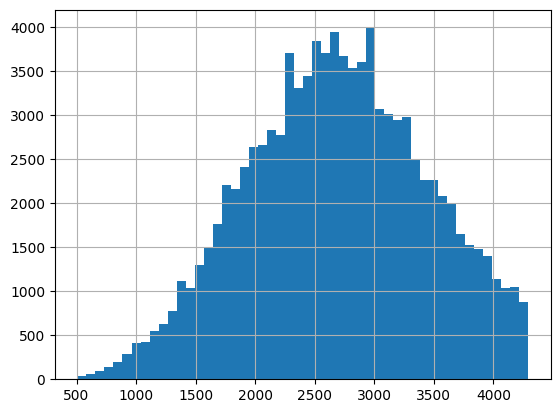

In [ ]:
## Me quedo con estos
#df_copia = df_train.copy()

# df_train = df_train[df_train.price_m2<p90]
# df_train = df_train[df_train.price_m2>500]

# df_train['log_price'] = np.log(df_train.price)
# df_train['log_price_m2'] = np.log(df_train.price_m2)

# #df_train['log_price_m2'].hist(bins=50)
# #df_train['log_price'].hist(bins=50)
# df_train['price_m2'].hist(bins=50)


In [ ]:
#df_train=df_copia.copy()

# **VARIABLE PRICE**

### Price Peso a Dolar (prueba)

In [ ]:
## MODIFCIAMOS EL DATAFRAME DE COTIZACIONES DOLAR y TRAIN para OBTENER LA COTIZACIOn
cotizaciones_usd['fecha_ano_mes']=cotizaciones_usd.fecha.map(fecha_año_mes)
cotizaciones_usd_mensual = cotizaciones_usd.groupby('fecha_ano_mes').max('usd_maximo')
cotizaciones_usd_mensual=cotizaciones_usd_mensual.rename(columns={'usd_maximo':'usd_peso'})


df_test['fecha_ano_mes'] = df_test.start_date.map(fecha_año_mes)
df_train['fecha_ano_mes'] = df_train.start_date.map(fecha_año_mes)

#les ponemos la cotizacion
df_train = df_train.merge(cotizaciones_usd_mensual, on='fecha_ano_mes')
df_test= df_test.merge(cotizaciones_usd_mensual, on='fecha_ano_mes')

del cotizaciones_usd
del cotizaciones_usd_mensual

# CREAMOS LA VARIABLES DE PRECIO CORREGIDO y CURRENCY CORREGIDO
df_train['price_corregido'] = df_train['price']
df_train.loc[df_train.currency=='ARS','price_corregido'] = df_train['price']/df_train['usd_peso']

df_train['currency_corregido'] = df_train['currency']
df_train.loc[df_train.currency=='ARS','currency_corregido'] = 'USD'

df_test['currency_corregido'] = df_test['currency']
df_test.loc[df_test.currency=='ARS','currency_corregido'] = 'USD'

In [ ]:
x=df_train.price.value_counts(dropna=False)
print("Cantidad igual a 0: ",sum(df_train['price']==0))
print("Cantidad nula: ",sum(df_train['price'].isna()))



Cantidad igual a 0:  670
Cantidad nula:  3857


In [ ]:
df_train.price.quantile(q=0.95)


685000.0

count    930295.000000
mean     129747.585855
std      155687.526821
min           1.090909
25%       13000.000000
50%       85000.000000
75%      174000.000000
max      999999.000000
Name: price_corregido, dtype: float64 

# de Nans de Price: 0.0


<Axes: >

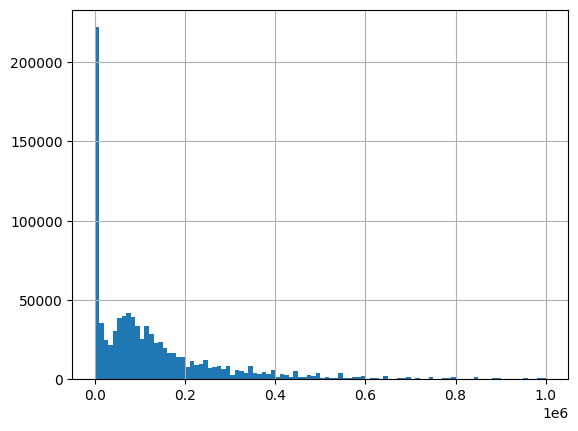

In [ ]:
#### ENTENDIMIENTO DE PRICE CORREGIDO ####

print(df_train['price_corregido'].describe(), "\n")

print(f"# de Nans de Price: {df_train['price_corregido'].isna().sum()/len(df_train)}")

#len(df_train[df_train.price_corregido> 1000000] ) #eliminamos deptos de mas de 1millon de dolares. Son 2.433 de los 125mil del test
#len(df_train)

q95 = df_train.price_corregido.quantile(q=0.95)
df_train = df_train[df_train.price_corregido> q95]
df_train = df_train[df_train.price_corregido> 1]

df_train['price_corregido'].hist(bins=100)

In [ ]:
print(len(df_train[df_train.price_corregido> 100000]) ) #eliminamos deptos de mas de 1millon de dolares. Son 2.433 de los 125mil del test
print(len(df_train))

print(len(df_train[df_train.price_corregido<1000]) ) #porque hay tantos de menos de 1000 dolares????

403816
930290
176721


# **PENDIENTES**

- Bolsa palabras para ver mas usadas. Agrupad por transporte, cochera,...
- Revisar que la imputacion este dando bien
- No cortar el precio porque si
- Mirando el precio por barrios, hay casos aberrantes. Pero despues, hay otros que parecen caros porque tienen pileta, gimnasio y un monton de cosas. HAcer tesx mining y volver a hacer el boxplot con el hue en gimansio, pileta y/o otros
- Revisar lo que no tienen longitud y latitud. Imputar long.lat y barrio. En test, ponerle alguno en base al promedio por localidad

Increíble depto en piso 31 en Torre con todos los amenities! \n3 ambientes amplios de 78 mts \n2 baño completos \n1 dormitorio en suite \nCochera fija y cubierta\nInmejorable estado de toda la unidad \nSuper luminoso todos los ambientes, ventilan al exterior con inmejorables vistas \nExpensas $11.780 incluye Aysa \nAbl $1.400 \n\nAMENITIES Y SERVICIOS \n- Halls de acceso de doble altura \n- Jardín parquizado e iluminado \n- Conserjería y vigilancia 24 hs. \n- 45 camaras de Seguridad perimetral \n- Portón de acceso y reja perimetral \n- Salón de usos múltiples para fiestas y eventos. Sky meeting \n- Piscina exterior climatizada para adultos y niños \n- Espacio bar-kiosco \n- Solarium \n- Sector parrillas \n- Cancha de tenis iluminada \n- Cancha de fútbol 5 iluminada \n- Gimnasio. Duchas y sanitarios \n- Spa: sauna, hidromasaje y sala de relax \n- Plaza de juegos exteriores para niños \n- Laundry \n- Vestuario para personal de servicio \n- Cocheras fijas opcionales cubiertas y descubiertas \n- Bicicleteros \n- Sala de carros bebés \n- Grupo electrógeno \n- Ascensores de alta velocidad. Puertas automáticas.